<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/Nico/DLY0100_Entrega_1_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 1 - Entrenando redes feedforward

**Autores:**

+ Nombre autor 1
+ Nombre autor 2

**Correos Electrónicos:**

+ Correo autor 1
+ Correo autor 2

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Deep Learning de la carrera de Ingeniería en Informática de DuocUC sede Concepción.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [1]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-09 21:14:52--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 172.217.214.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.05s   

2025-04-09 21:14:52 (175 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-04-09 21:14:52--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 172.217.214.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [

In [2]:
!ls -lh

total 12M
drwxr-xr-x 1 root root 4.0K Apr  7 13:43 sample_data
-rw-r--r-- 1 root root 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [3]:
import gzip
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
# Asegurar que las etiquetas están en formato correcto
from keras.utils import to_categorical

#Introduccion

Introducción: Descripción del problema y objetivo del modelo.


# Carga de imágenes

In [4]:
# Función para cargar imágenes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Función para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificación

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


Describe en detalle el proceso de carga y preprocesamiento de datos, justificando las decisiones tomadas.

.#Explicar la normalizacion y el one-hot, agregar tambien la distribucion de las fotos, saber cuantas fotos de x numeros tenemos, poner cuantas imagenes tenemos para entrenamiento y testeo, tamaño de las fotos,

# Muestra imágenes

In [ ]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

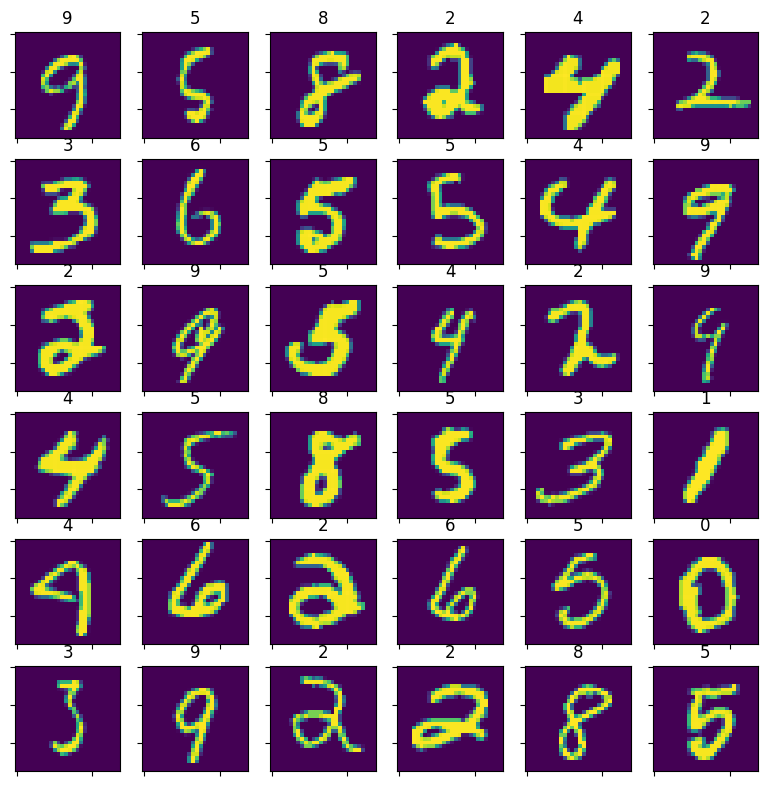

In [ ]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [ ]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de imágenes del número {i}: {numimagen[i]}")

Cantidad de imágenes del número 0: 5923.0
Cantidad de imágenes del número 1: 6742.0
Cantidad de imágenes del número 2: 5958.0
Cantidad de imágenes del número 3: 6131.0
Cantidad de imágenes del número 4: 5842.0
Cantidad de imágenes del número 5: 5421.0
Cantidad de imágenes del número 6: 5918.0
Cantidad de imágenes del número 7: 6265.0
Cantidad de imágenes del número 8: 5851.0
Cantidad de imágenes del número 9: 5949.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar( numimagen, color='skyblue')
plt.title('Cantidad de imágenes por número (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('Número', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de imágenes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x600 with 0 Axes>

#Configuracion de parametros(?

:##Definir que metricas vamos a usar y que oprimizador

.#Explicacion de que es épocas,batch size,optimizadores,loss?. ##Esto como introduccion a que dsp de experimentar podemos agregar la importancia de cada uno y se complementaria.

In [5]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


In [6]:
# Setea los seed para números random
np.random.seed(29)
tf.random.set_seed(29)

El propósito principal de establecer las semillas de los generadores de números aleatorios es permitir la reproducibilidad del código. Al fijar estas semillas, se asegura que cualquier persona que ejecute este código bajo las mismas condiciones (misma versión de librerías, hardware, etc.) obtendrá los mismos resultados. Esto es fundamental para la investigación científica, ya que permite validar resultados y compararlos en diferentes pruebas.

In [7]:
h1 = 512
h2 = 256
h3 = 128

In [ ]:
red = keras.Sequential(name="Mi_Red")
red.add(keras.layers.Dense(h1))
red.add(keras.layers.Dense(h2))
red.add(keras.layers.Dense(h3))
red.add(keras.layers.Dense(C))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist = red.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 342s 6ms/step - accuracy: 0.1668 - loss: 9.7147 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 384s 6ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 355s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 337s 6ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 361s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 308s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 304s 5ms/step - accuracy: 0.1677 - loss: 9.7274 - val_accuracy: 0.1553 - val_loss: 9.6930
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 323s 5ms/step - ac

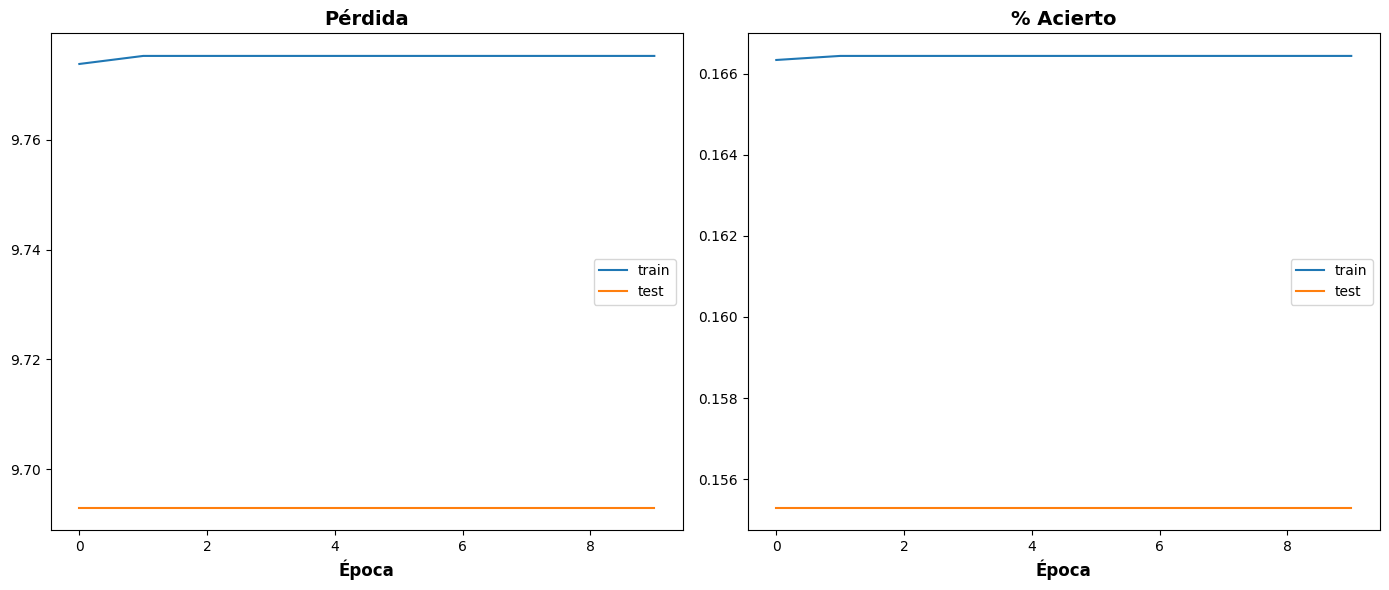

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist.history['loss'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_title('Pérdida', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist.history['accuracy'], label="train")
axs[1].plot(hist.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Escriba su código acá


red1 = keras.Sequential(name="Mi_Red")
red1.add(keras.layers.Input(shape=(N,), name='entrada'))
red1.add(keras.layers.Dense(h1, activation='relu'))
red1.add(keras.layers.Dense(h2, activation='relu'))
red1.add(keras.layers.Dense(h3, activation='relu'))
red1.add(keras.layers.Dense(C, activation='softmax'))

red1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist1 = red1.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 328s 5ms/step - accuracy: 0.8905 - loss: 0.3473 - val_accuracy: 0.9617 - val_loss: 0.1232
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 316s 5ms/step - accuracy: 0.9705 - loss: 0.0984 - val_accuracy: 0.9674 - val_loss: 0.1101
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 297s 5ms/step - accuracy: 0.9809 - loss: 0.0651 - val_accuracy: 0.9718 - val_loss: 0.0988
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 291s 5ms/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.9740 - val_loss: 0.1088
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 298s 5ms/step - accuracy: 0.9876 - loss: 0.0421 - val_accuracy: 0.9731 - val_loss: 0.1111
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 348s 5ms/step - accuracy: 0.9898 - loss: 0.0345 - val_accuracy: 0.9726 - val_loss: 0.1118
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 362s 5ms/step - accuracy: 0.9908 - loss: 0.0279 - val_accuracy: 0.9778 - val_loss: 0.0899
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 322s 5ms/step - ac

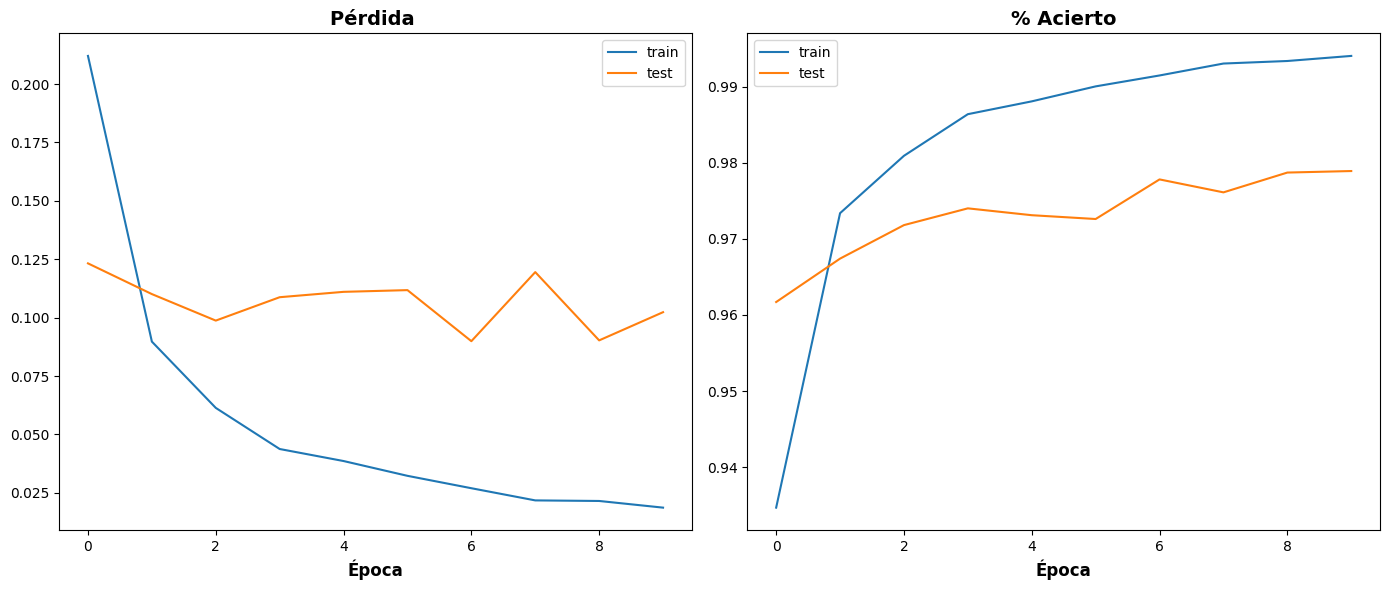

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist1.history['loss'], label="train")
axs[0].plot(hist1.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist1.history['accuracy'], label="train")
axs[1].plot(hist1.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [8]:
red2 = keras.Sequential(name="Mi_Red")
red2.add(keras.layers.Input(shape=(N,), name='entrada'))
red2.add(keras.layers.Dense(h1, activation='relu'))
red2.add(keras.layers.Dense(h2, activation='relu'))
red2.add(keras.layers.Dense(h3, activation='relu'))
red2.add(keras.layers.Dense(C, activation='softmax'))

red2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist2 = red2.fit(X_train, y_train,
        epochs=10,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5482 - loss: 1.6758 - val_accuracy: 0.8734 - val_loss: 0.5064
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8787 - loss: 0.4643 - val_accuracy: 0.9043 - val_loss: 0.3435
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9045 - loss: 0.3408 - val_accuracy: 0.9176 - val_loss: 0.2913
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9170 - loss: 0.2924 - val_accuracy: 0.9259 - val_loss: 0.2612
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9256 - loss: 0.2619 - val_accuracy: 0.9312 - val_loss: 0.2398
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9315 - loss: 0.2394 - val_accuracy: 0.9344 - val_loss: 0.2232
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9368 - loss: 0.2213 - val_accuracy: 0.9391 - val_loss: 0.2095
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9410 - loss: 0.2060 - val_a

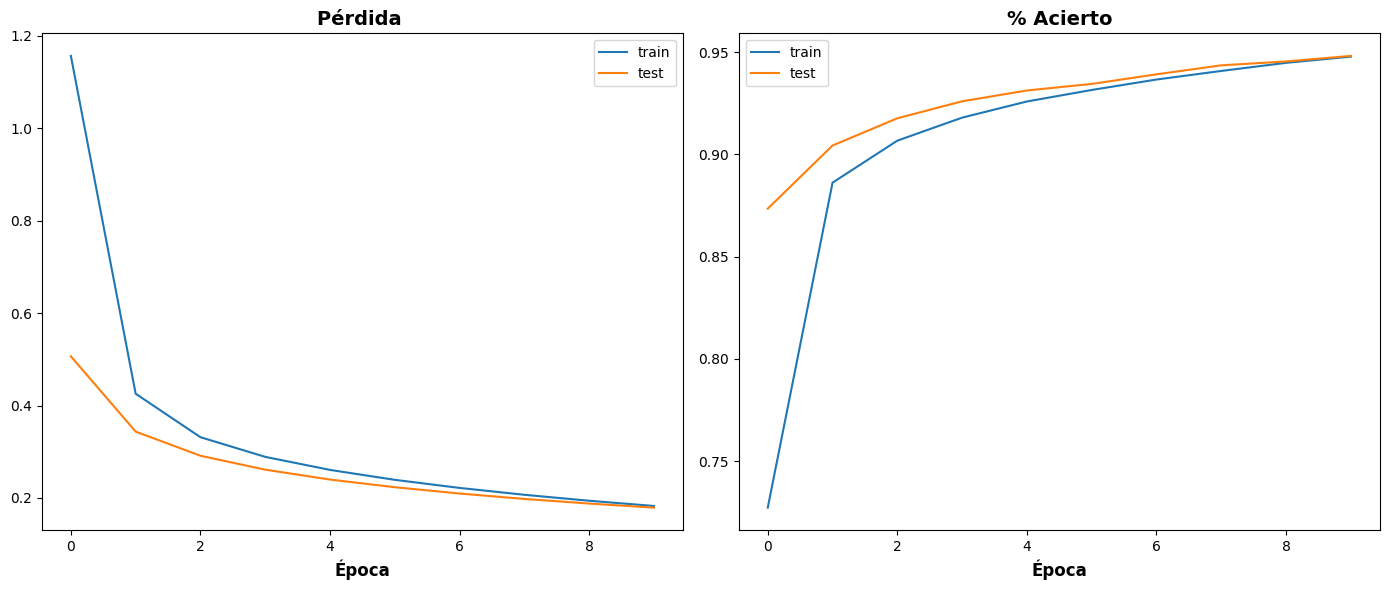

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist2.history['loss'], label="train")
axs[0].plot(hist2.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist2.history['accuracy'], label="train")
axs[1].plot(hist2.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [11]:
red3 = keras.Sequential(name="Mi_Red")
red3.add(keras.layers.Input(shape=(N,), name='entrada'))
#
red3.add(keras.layers.Dense(30, activation='relu'))
red3.add(keras.layers.Dropout(0.3))
red3.add(keras.layers.Dense(20, activation='relu'))
#
red3.add(keras.layers.Dense(h1, activation='relu'))
red3.add(keras.layers.Dense(h2, activation='relu'))
red3.add(keras.layers.Dense(h3, activation='relu'))
red3.add(keras.layers.Dense(C, activation='softmax'))

red3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist3 = red3.fit(X_train, y_train,
        epochs=10,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1631 - loss: 2.2777 - val_accuracy: 0.4380 - val_loss: 1.8836
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4471 - loss: 1.6797 - val_accuracy: 0.7580 - val_loss: 0.8777
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6821 - loss: 0.9616 - val_accuracy: 0.8502 - val_loss: 0.5318
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7779 - loss: 0.6933 - val_accuracy: 0.8768 - val_loss: 0.4260
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8133 - loss: 0.5855 - val_accuracy: 0.8910 - val_loss: 0.3705
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8360 - loss: 0.5283 - val_accuracy: 0.9001 - val_loss: 0.3361
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8518 - loss: 0.4825 - val_accuracy: 0.9094 - val_loss: 0.3091
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8624 - loss: 0.4489 - val_accurac

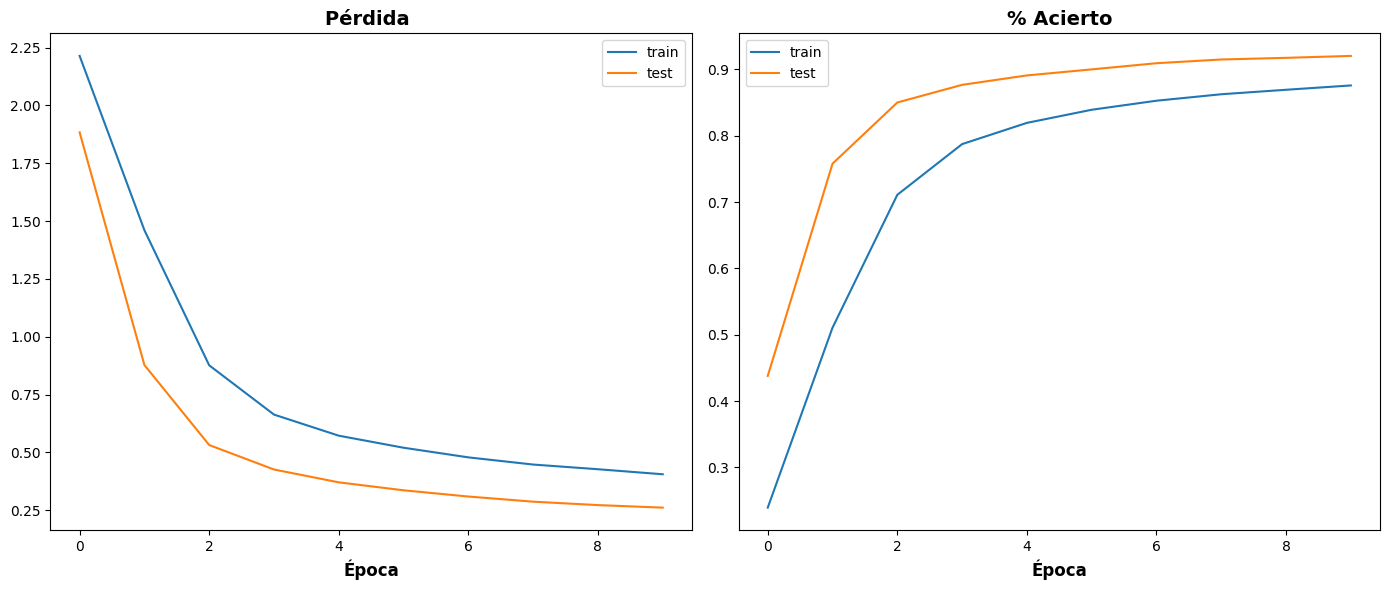

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist3.history['loss'], label="train")
axs[0].plot(hist3.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist3.history['accuracy'], label="train")
axs[1].plot(hist3.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [13]:
red3 = keras.Sequential(name="Mi_Red")
red3.add(keras.layers.Input(shape=(N,), name='entrada'))
#
red3.add(keras.layers.Dense(30, activation='relu'))
red3.add(keras.layers.Dropout(0.3))
red3.add(keras.layers.Dense(20, activation='relu'))
#
red3.add(keras.layers.Dense(h1, activation='relu'))
red3.add(keras.layers.Dense(h2, activation='relu'))
red3.add(keras.layers.Dense(h3, activation='relu'))
red3.add(keras.layers.Dense(C, activation='softmax'))

red3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist3 = red3.fit(X_train, y_train,
        epochs=150,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1661 - loss: 2.2747 - val_accuracy: 0.4048 - val_loss: 1.9203
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4345 - loss: 1.7005 - val_accuracy: 0.7453 - val_loss: 0.8817
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6697 - loss: 0.9816 - val_accuracy: 0.8493 - val_loss: 0.5395
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7695 - loss: 0.7105 - val_accuracy: 0.8816 - val_loss: 0.4128
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8149 - loss: 0.5839 - val_accuracy: 0.8927 - val_loss: 0.3586
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8397 - loss: 0.5107 - val_accuracy: 0.9007 - val_loss: 0.3271
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8530 - loss: 0.4758 - val_accuracy: 0.9089 - val_loss: 0.2977
Epoch 8/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8595 - loss: 0.4459 - val_acc

batch=128 ; accuracy: 0.9468 - loss: 0.1866 - val_accuracy: 0.9491 - val_loss: 0.1784
DIF acc: 0.0023 Dif los: 0.082
#mayor batch= menos dif de las métricas
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5482 - loss: 1.6758 - val_accuracy: 0.8734 - val_loss: 0.5064
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8787 - loss: 0.4643 - val_accuracy: 0.9043 - val_loss: 0.3435
#Mejor timpo, mal resultado en una primera época, mejora en una segunda y ya desde una tercera a 4 mejora y se mantienen

batch=1 ; accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9789 - val_loss: 0.1024

Dif acc: 0.0244

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 328s 5ms/step - accuracy: 0.8905 - loss: 0.3473 - val_accuracy: 0.9617 - val_loss: 0.1232
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 316s 5ms/step - accuracy: 0.9705 - loss: 0.0984 - val_accuracy: 0.9674 - val_loss: 0.1101
#mayor tiempo, buen resultado en la primera época, la segunda mejora aun mas y se mantiene

 accuracy: 0.8757 - loss: 0.4057 - val_accuracy: 0.9204 - val_loss: 0.2612

#Las capas de abandono han sido el método predilecto para reducir el sobreajuste de las redes neuronales, pero en este caso tuvo un
resultado mas sobreajustado que sin el método dropout

¿Qué son las funciones de activación?
Las funciones de activación son un componente fundamental de las redes neuronales , permitiéndoles aprender patrones complejos en los datos. Transforman la señal de entrada de un nodo de la red neuronal en una señal de salida que se transmite a la siguiente capa. Sin funciones de activación, las redes neuronales se limitarían a modelar únicamente relaciones lineales entre entradas y salidas.

Las funciones de activación introducen no linealidades, lo que permite que las redes neuronales aprendan asignaciones altamente complejas entre entradas y salidas.

Elegir la función de activación adecuada es crucial para entrenar redes neuronales que generalicen bien y proporcionen predicciones precisas. En esta publicación, ofreceremos una descripción general de las funciones de activación más comunes, sus funciones y cómo seleccionar las funciones de activación adecuadas para diferentes casos de uso.

Ya sea que recién esté comenzando en el aprendizaje profundo o sea un profesional experimentado, comprender las funciones de activación en profundidad fortalecerá su intuición y mejorará su aplicación de redes neuronales.